# Geometric Scaling of Image

Geometric Scaling or zooming of image can be done by the following two methods:
* Zooming by Pixel Replication
* Zooming by Pixel Interpolation
    * Linear Interpolation
    * Bilinear Interpolation
    * Cubic and Cubic Spline Interpolation

Import the Libraries

In [54]:
import cv2
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Import the dicom image

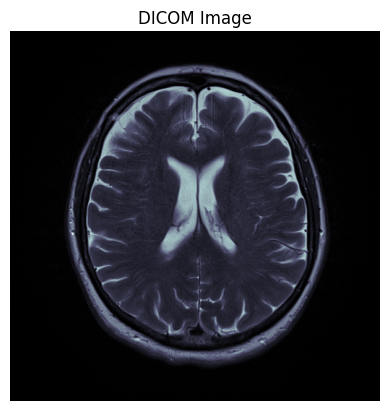

In [55]:
#read the DICOM file
filename = pydicom.dcmread('/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/Head_MRI.dcm')

#read the image pixel values
mri = filename.pixel_array

# Display the image
plt.imshow(mri, cmap=plt.cm.bone)
plt.title("DICOM Image")
plt.axis('off')
plt.show()

read other images

In [56]:
bdot =mpimg.imread("/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/blackdot.jpg")
atm =mpimg.imread("/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/atm.jpg")
box =mpimg.imread("/home/sandzz/Documents/All documents/College/Study materials/8th sem /Medical_Image_Processing/Babaal_project/Images/box.jpg")

Applying Zooming by Pixel Replication

In [76]:
# create a funtion for image zooming by pixel replication
def replicate_zoom (image, factor):
    #load the image parameters
    h, w, ch = image.shape
    #create a new dimentsions for the zoomed image
    new_h, new_w = h * factor, w * factor
    #create a matrix of new dimensions with same data type as the original image
    zoomed_image = np.zeros((new_h, new_w, ch), dtype=image.dtype)
    #fill the new matrix with pixel replication from the original image
    for c in range(ch):
        for x in range(h):
            for y in range(w):
                replicating_pixel = image[x, y, c]
                for i in range(factor):
                    for j in range(factor):
                        zoomed_image[x*factor+i, y*factor+j, c] = replicating_pixel
    return zoomed_image

import math

#create a function for image zooming by interpolation
def interpolate_zoom(image, factor):
    #load the image parameters
    h, w, ch = image.shape
    #create a new dimensions for the zoomed image
    new_h, new_w = h * factor, w * factor
    # create a matrix of new dimensions with same data type as the original image
    zoomed_image = np.zeros((new_h, new_w, ch), dtype=image.dtype)

    #inverse mapping the zoomed pixels coordinates to the original image pixels and finding the four coordinates in the original image for bilinear interpolation
    for c in range(ch):
        for x in range(new_h):
            for y in range (new_w):
                icx = math.floor((x-0.5)/factor +0.5)
                icy = math.floor((y-0.5)/factor +0.5)
                
                #check if the four coordinates are within the bounds of the original image
                x0, y0 = icx, icy
                x1, y0 = min(icx + 1, h - 1), icy
                x0, y1 = icx, min(icy + 1, w - 1)
                x1, y1 = min(icx + 1, h - 1), min(icy + 1, w - 1)
            
                # Calculate the pixel intensity of the zoomed pixel using bilinear interpolation
                R1 = ((x1 - (x / factor)) * image[x0, y0, c] + ((x / factor) - x0) * image[x1, y0, c])
                R2 = ((x1 - (x / factor)) * image[x0, y1, c] + ((x / factor) - x0) * image[x1, y1, c])
                pixel_value = ((y1 - (y / factor)) * R1 + ((y / factor) - y0) * R2)
               
                #print(f"this is the type of the pixel_value:{type(pixel_value)}")
                zoomed_image[x, y, c] = np.clip(pixel_value, 0, 255).astype(np.uint8)
    #return the zoomed image
    return zoomed_image

Applying zooming

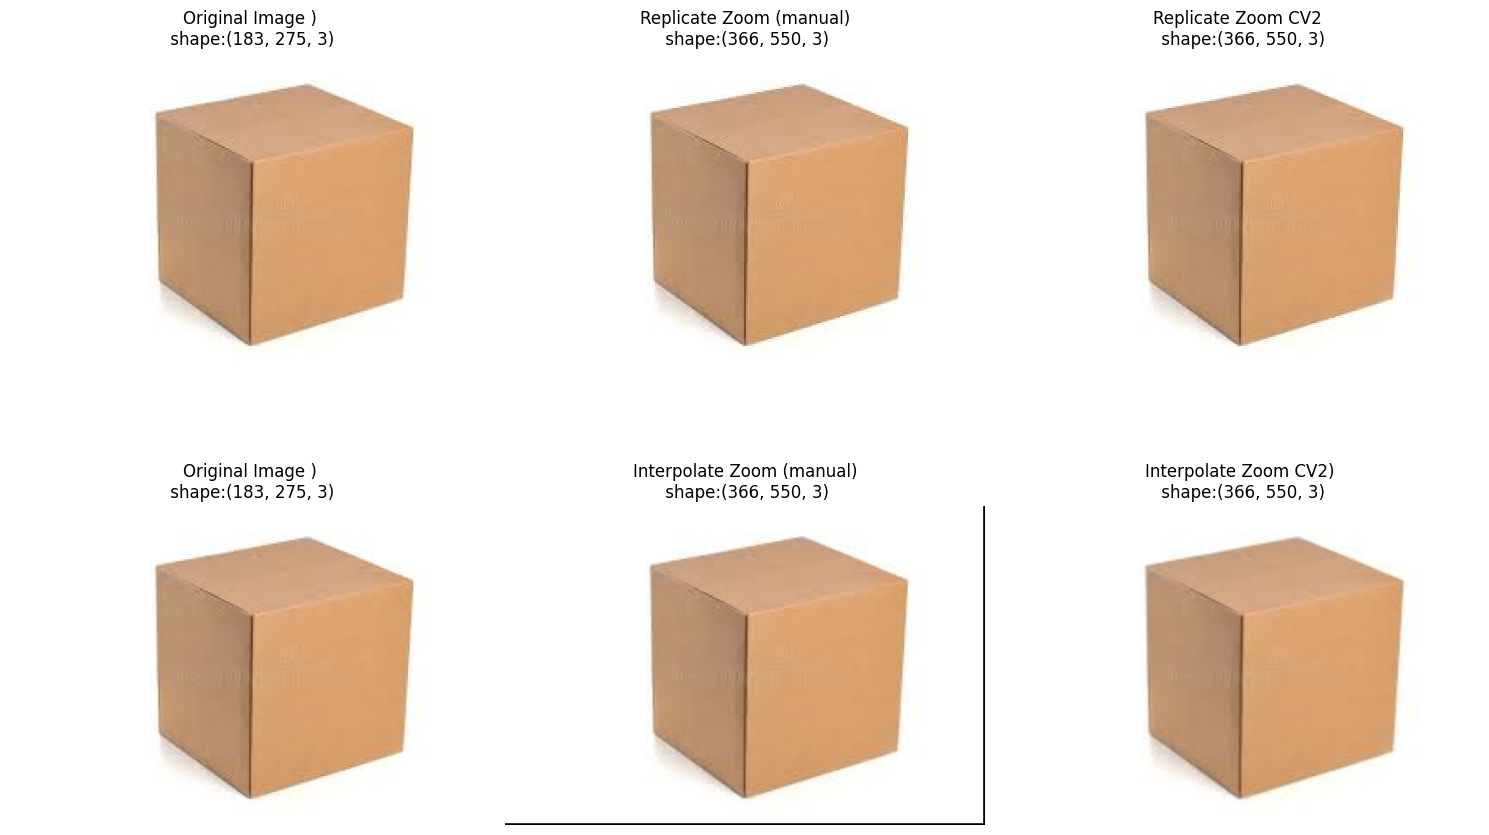

In [77]:

# Load the image
img = box

# Define the scale factor for zooming
scale_factor = 2 

# Apply zooming using pixel replication and interpolation
replicate_zoomed = replicate_zoom(img, scale_factor)
interpolate_zoomed = interpolate_zoom(img, scale_factor)

# Apply OpenCV's built-in zoom functions
cv2_replicate_zoomed = cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
cv2_interpolate_zoomed = cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

# Display the original and zoomed images
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.title(f"Original Image )\n shape:{img.shape}")
plt.imshow(img)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title(f"Replicate Zoom (manual)\n shape:{replicate_zoomed.shape}")
plt.imshow(replicate_zoomed)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title(f"Replicate Zoom CV2 \n shape:{cv2_replicate_zoomed.shape}")
plt.imshow(cv2_replicate_zoomed)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title(f"Original Image )\n shape:{img.shape}")
plt.imshow(img)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title(f"Interpolate Zoom (manual)\n shape:{interpolate_zoomed.shape}")
plt.imshow(interpolate_zoomed)
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title(f"Interpolate Zoom CV2)\n shape:{cv2_interpolate_zoomed.shape}")
plt.imshow(cv2_interpolate_zoomed)
plt.axis('off')

plt.tight_layout()
plt.show()
